# Facebook Prophet - Regresores

In [1]:
# Posibles instalaciones antes de empezar.
# Ejecutar en anaconda (terminal)


# conda install -c anaconda ephem
# conda install -c conda-forge pystan
# conda install -c conda-forge fbprophet

In [2]:
# pip install prophet

In [3]:
# pip install plotly

In [4]:
import  scipy.signal.signaltools

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

In [5]:
import warnings
warnings.filterwarnings(action="ignore")

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import pandas as pd
%matplotlib inline

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.metrics import mean_squared_error
from math import sqrt

from prophet import Prophet

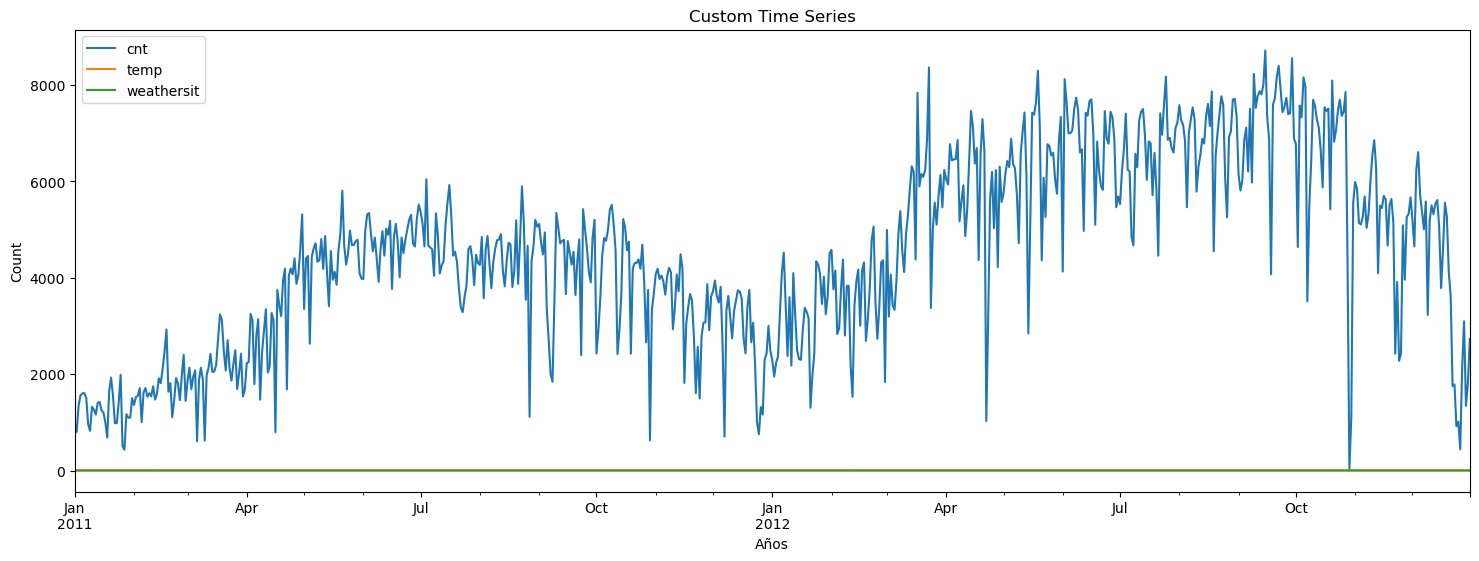

In [6]:
# Cargamos el dataset
real = pd.read_csv('data/bike_rentals.csv', parse_dates=['dteday'], index_col=1)[['cnt', 'temp', 'weathersit']]

ax = real.plot(figsize=(18,6), title='Custom Time Series');
ax.set_xlabel("Años");
ax.set_ylabel("Count");

In [7]:
def splitSet(df, TEST_SIZE):
    
    # Train set
    train_full = df[:(int(len(df)*(1-TEST_SIZE)))]
    train = train_full[:(int(len(train_full)*(1-TEST_SIZE)))]

    # Validation set
    valid = train_full[(int(len(train_full)*(1-TEST_SIZE))):]

    # Test set
    test = df[(int(len(df)*(1-TEST_SIZE))):]

    return train, valid, test

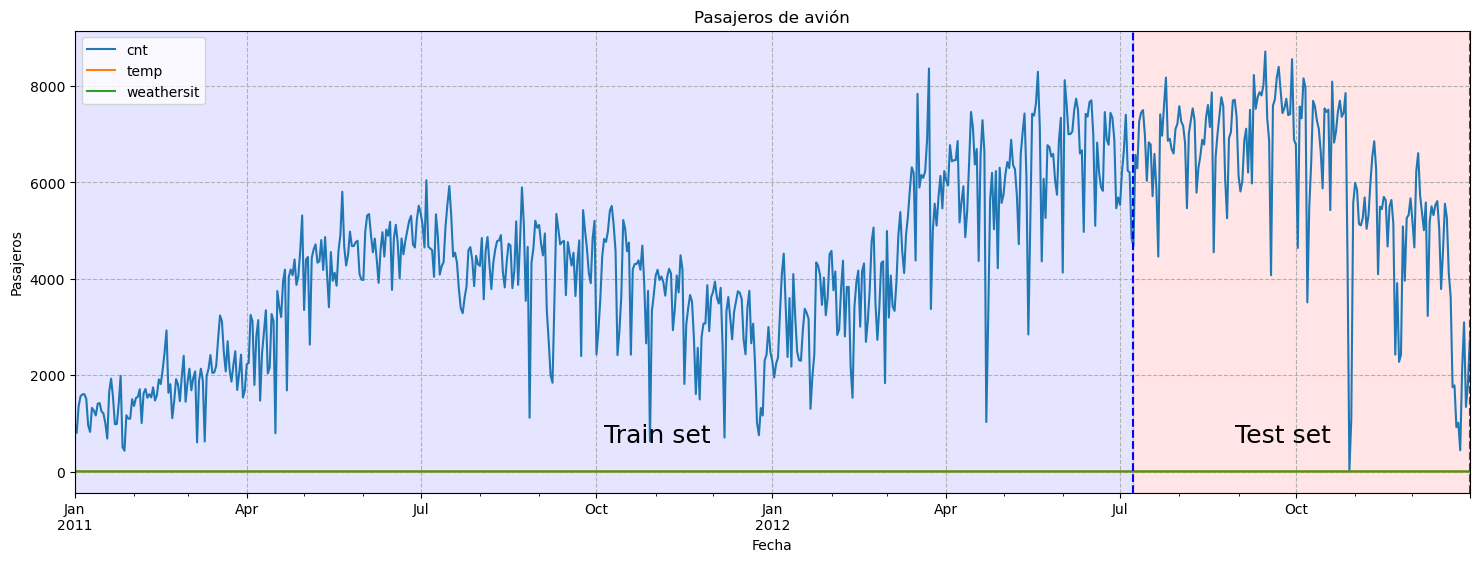

In [8]:
# Split dataset
TEST_SIZE = 0.24
train, valid, test = splitSet(real, TEST_SIZE)

# Trabajamos sólo con train y test
train = pd.concat([train, valid], axis=0)

# Visualización
ax = real.plot(figsize=(18,6), title='Pasajeros de avión');

init__limit = real.index[0]
train_limit = real.index[len(train)-1]
test__limit = real.index[len(train)+len(test)-1]

ax.axvline(train_limit, linestyle='--', color='blue')
ax.axvline(test__limit, linestyle='--', color='red')

ax.axvspan(init__limit, train_limit, alpha=0.1, color='blue')
ax.axvspan(train_limit, test__limit, alpha=0.1, color='red')

ax.text(real.index[int((len(train)-1)*0.5)], 610, 'Train set', fontsize=18)
ax.text(real.index[int(len(train)+(len(test)-1)*0.3)], 610, 'Test set', fontsize=18)

ax.grid(linestyle='--')

ax.set_xlabel("Fecha");
ax.set_ylabel("Pasajeros");

In [9]:
bikeRentMetrics = pd.DataFrame(columns=['Model', 'RMSE'])

## Facebook Prophet - Simple

20:16:56 - cmdstanpy - INFO - Chain [1] start processing
20:16:56 - cmdstanpy - INFO - Chain [1] done processing


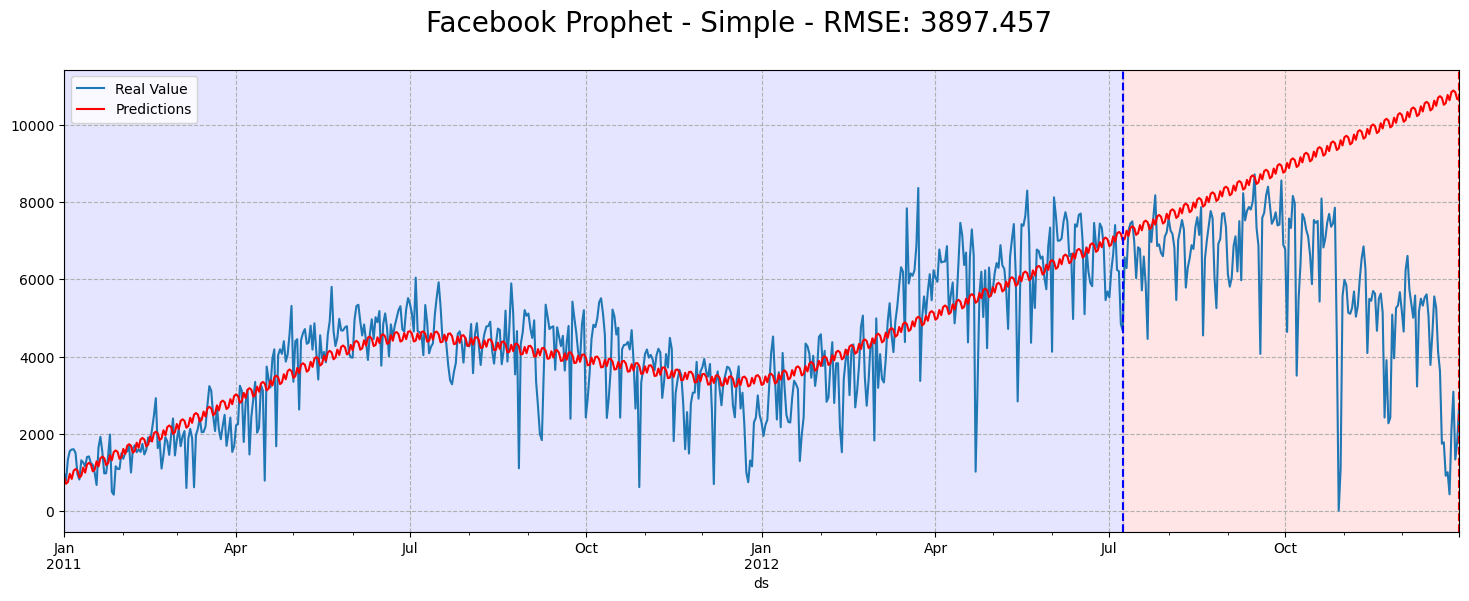

In [10]:
# Model
MODEL = 'Facebook Prophet - Simple'

# Preparing time series for Prophet
real_prophet = pd.DataFrame()
real_prophet['ds'] = real.index
real_prophet['y'] = real['cnt'].values

train_prophet = pd.DataFrame()
train_prophet['ds'] = train.index
train_prophet['y'] = train['cnt'].values

test_prophet = pd.DataFrame()
test_prophet['ds'] = test.index
test_prophet['y'] = test['cnt'].values

# Training model
model = Prophet()

model = model.fit(train_prophet)

# Get Test Set Predictions
predict_test = model.predict(test_prophet)

# Get RMSE from Test Set
real_values = test_prophet['y']
pred_values = predict_test['yhat']
rmse = sqrt(mean_squared_error(real_values, pred_values))

# Get predictions from whole set
predictions = model.predict(real_prophet)

# Preparing data to plot
real_plot = real_prophet['y']
real_plot.index = real_prophet['ds']
pred_plot = predictions['yhat']
pred_plot.index = predictions['ds']

# Visualization
figure(figsize=(18, 6))

real_plot.plot(label='Real Value')
pred_plot.plot(label='Predictions', color='red')
plt.suptitle(MODEL + ' - RMSE: ' + str(np.round(rmse, 3)), fontsize=20)
plt.legend();

plt.axvline(train_limit, linestyle='--', color='blue');
plt.axvline(test__limit, linestyle='--', color='red');

plt.axvspan(init__limit, train_limit, alpha=0.1, color='blue');
plt.axvspan(train_limit, test__limit, alpha=0.1, color='red');

plt.grid(linestyle='--')

metric_data = {'Model':MODEL, 'RMSE':np.round(rmse, 3)}
bikeRentMetrics = bikeRentMetrics.append(metric_data, ignore_index=True)

## Facebook Prophet - With Parameters

20:16:56 - cmdstanpy - INFO - Chain [1] start processing
20:16:57 - cmdstanpy - INFO - Chain [1] done processing


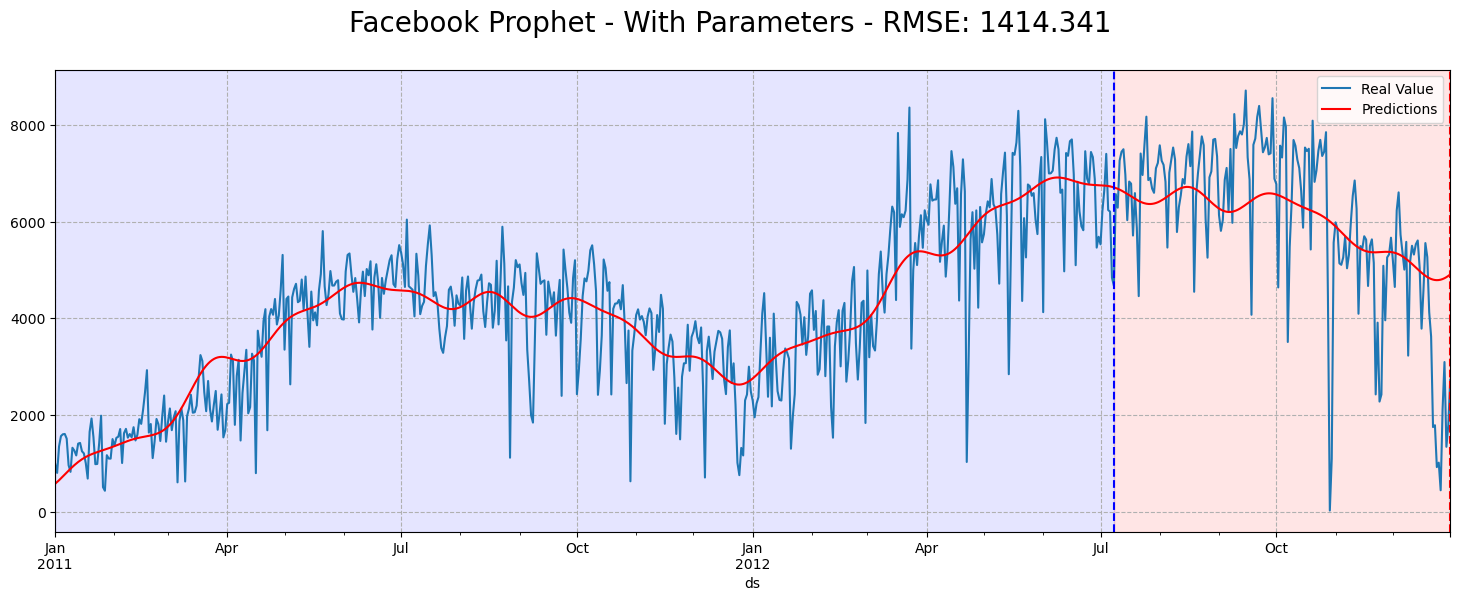

In [11]:
# Model
MODEL = 'Facebook Prophet - With Parameters'

# Preparing time series for Prophet
real_prophet = pd.DataFrame()
real_prophet['ds'] = real.index
real_prophet['y'] = real['cnt'].values

train_prophet = pd.DataFrame()
train_prophet['ds'] = train.index
train_prophet['y'] = train['cnt'].values

test_prophet = pd.DataFrame()
test_prophet['ds'] = test.index
test_prophet['y'] = test['cnt'].values

# Parameters
seasonality_mode = True
daily_seasonality = False
weekly_seasonality = False
montly_seasonality = False
yearly_seasonality = True
decomposition_model = 'additive'

# Training model
model = Prophet(
    daily_seasonality=daily_seasonality,
    weekly_seasonality=weekly_seasonality,
    yearly_seasonality=yearly_seasonality,
    seasonality_mode=decomposition_model
)

model = model.fit(train_prophet)

# Get Test Set Predictions
predict_test = model.predict(test_prophet)

# Get RMSE from Test Set
real_values = test_prophet['y']
pred_values = predict_test['yhat']
rmse = sqrt(mean_squared_error(real_values, pred_values))

# Get predictions from whole set
predictions = model.predict(real_prophet)

# Preparing data to plot
real_plot = real_prophet['y']
real_plot.index = real_prophet['ds']
pred_plot = predictions['yhat']
pred_plot.index = predictions['ds']

# Visualization
figure(figsize=(18, 6))

real_plot.plot(label='Real Value')
pred_plot.plot(label='Predictions', color='red')
plt.suptitle(MODEL + ' - RMSE: ' + str(np.round(rmse, 3)), fontsize=20)
plt.legend();

plt.axvline(train_limit, linestyle='--', color='blue');
plt.axvline(test__limit, linestyle='--', color='red');

plt.axvspan(init__limit, train_limit, alpha=0.1, color='blue');
plt.axvspan(train_limit, test__limit, alpha=0.1, color='red');

plt.grid(linestyle='--')

metric_data = {'Model':MODEL, 'RMSE':np.round(rmse, 3)}
bikeRentMetrics = bikeRentMetrics.append(metric_data, ignore_index=True)

## Facebook Prophet - With Parameters & Temperature

20:16:57 - cmdstanpy - INFO - Chain [1] start processing
20:16:57 - cmdstanpy - INFO - Chain [1] done processing


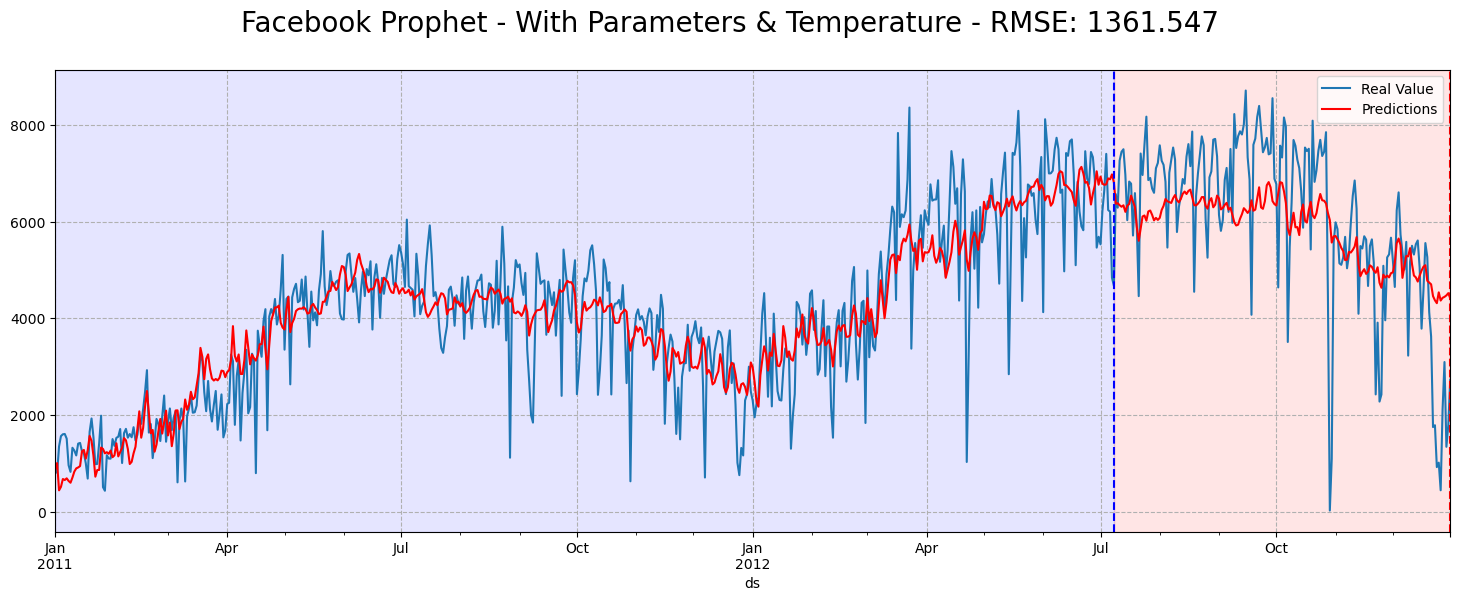

In [12]:
# Model
MODEL = 'Facebook Prophet - With Parameters & Temperature'

# Preparing time series for Prophet
real_prophet = pd.DataFrame()
real_prophet['ds'] = real.index
real_prophet['y'] = real['cnt'].values
real_prophet['temp'] = real['temp'].values

train_prophet = pd.DataFrame()
train_prophet['ds'] = train.index
train_prophet['y'] = train['cnt'].values
train_prophet['temp'] = train['temp'].values

test_prophet = pd.DataFrame()
test_prophet['ds'] = test.index
test_prophet['y'] = test['cnt'].values
test_prophet['temp'] = test['temp'].values

# Parameters
seasonality_mode = True
daily_seasonality = False
weekly_seasonality = False
montly_seasonality = False
yearly_seasonality = True
decomposition_model = 'additive'

# Training model
model = Prophet(
    daily_seasonality=daily_seasonality,
    weekly_seasonality=weekly_seasonality,
    yearly_seasonality=yearly_seasonality,
    seasonality_mode=decomposition_model
)

# Add Regressor
model.add_regressor('temp')

model = model.fit(train_prophet)

# Get Test Set Predictions
predict_test = model.predict(test_prophet)

# Get RMSE from Test Set
real_values = test_prophet['y']
pred_values = predict_test['yhat']
rmse = sqrt(mean_squared_error(real_values, pred_values))

# Get predictions from whole set
predictions = model.predict(real_prophet)

# Preparing data to plot
real_plot = real_prophet['y']
real_plot.index = real_prophet['ds']
pred_plot = predictions['yhat']
pred_plot.index = predictions['ds']

# Visualization
figure(figsize=(18, 6))

real_plot.plot(label='Real Value')
pred_plot.plot(label='Predictions', color='red')
plt.suptitle(MODEL + ' - RMSE: ' + str(np.round(rmse, 3)), fontsize=20)
plt.legend();

plt.axvline(train_limit, linestyle='--', color='blue');
plt.axvline(test__limit, linestyle='--', color='red');

plt.axvspan(init__limit, train_limit, alpha=0.1, color='blue');
plt.axvspan(train_limit, test__limit, alpha=0.1, color='red');

plt.grid(linestyle='--')

metric_data = {'Model':MODEL, 'RMSE':np.round(rmse, 3)}
bikeRentMetrics = bikeRentMetrics.append(metric_data, ignore_index=True)

## Facebook Prophet - With Parameters, Temperature & Weather

20:16:58 - cmdstanpy - INFO - Chain [1] start processing
20:16:58 - cmdstanpy - INFO - Chain [1] done processing


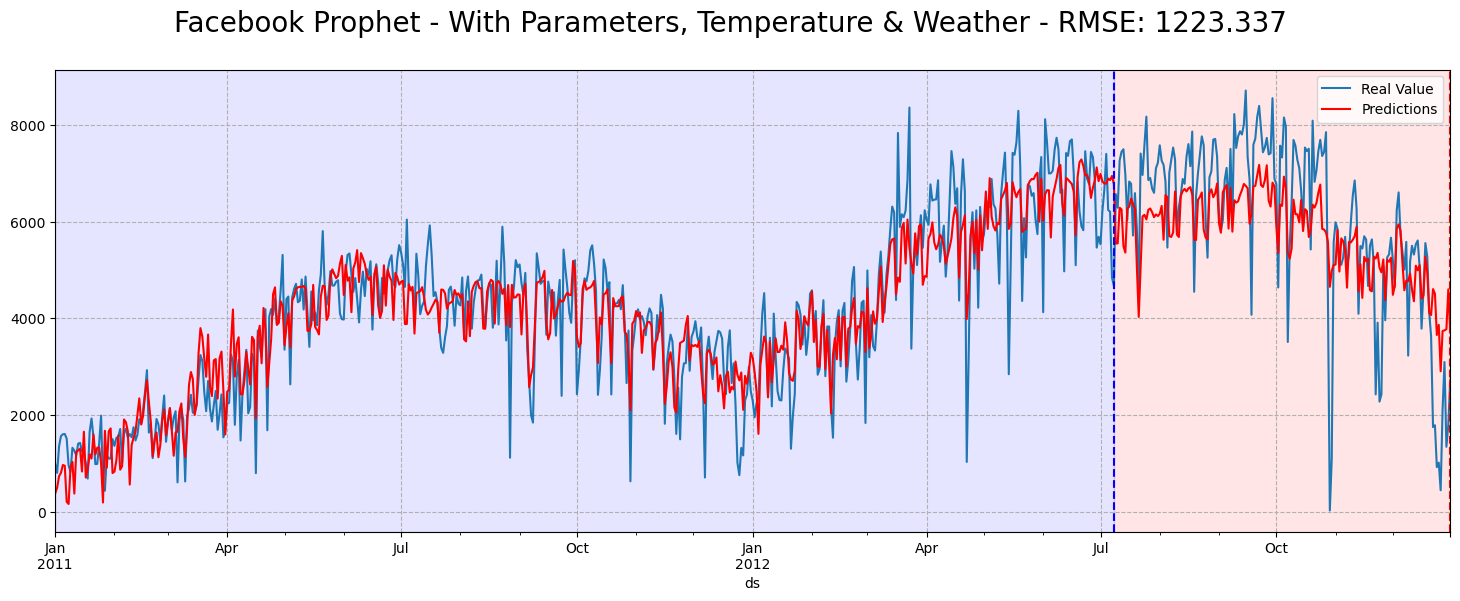

In [13]:
# Model
MODEL = 'Facebook Prophet - With Parameters, Temperature & Weather'

# Preparing time series for Prophet
real_prophet = pd.DataFrame()
real_prophet['ds'] = real.index
real_prophet['y'] = real['cnt'].values
real_prophet['temp'] = real['temp'].values
real_prophet['weathersit'] = real['weathersit'].values

train_prophet = pd.DataFrame()
train_prophet['ds'] = train.index
train_prophet['y'] = train['cnt'].values
train_prophet['temp'] = train['temp'].values
train_prophet['weathersit'] = train['weathersit'].values

test_prophet = pd.DataFrame()
test_prophet['ds'] = test.index
test_prophet['y'] = test['cnt'].values
test_prophet['temp'] = test['temp'].values
test_prophet['weathersit'] = test['weathersit'].values

# Parameters
seasonality_mode = True
daily_seasonality = False
weekly_seasonality = False
montly_seasonality = False
yearly_seasonality = True
decomposition_model = 'additive'

# Training model
model = Prophet(
    daily_seasonality=daily_seasonality,
    weekly_seasonality=weekly_seasonality,
    yearly_seasonality=yearly_seasonality,
    seasonality_mode=decomposition_model
)

# Add Regressor
model.add_regressor('temp')
model.add_regressor('weathersit')

model = model.fit(train_prophet)

# Get Test Set Predictions
predict_test = model.predict(test_prophet)

# Get RMSE from Test Set
real_values = test_prophet['y']
pred_values = predict_test['yhat']
rmse = sqrt(mean_squared_error(real_values, pred_values))

# Get predictions from whole set
predictions = model.predict(real_prophet)

# Preparing data to plot
real_plot = real_prophet['y']
real_plot.index = real_prophet['ds']
pred_plot = predictions['yhat']
pred_plot.index = predictions['ds']

# Visualization
figure(figsize=(18, 6))

real_plot.plot(label='Real Value')
pred_plot.plot(label='Predictions', color='red')
plt.suptitle(MODEL + ' - RMSE: ' + str(np.round(rmse, 3)), fontsize=20)
plt.legend();

plt.axvline(train_limit, linestyle='--', color='blue');
plt.axvline(test__limit, linestyle='--', color='red');

plt.axvspan(init__limit, train_limit, alpha=0.1, color='blue');
plt.axvspan(train_limit, test__limit, alpha=0.1, color='red');

plt.grid(linestyle='--')

metric_data = {'Model':MODEL, 'RMSE':np.round(rmse, 3)}
bikeRentMetrics = bikeRentMetrics.append(metric_data, ignore_index=True)

In [14]:
bikeRentMetrics.sort_values(by=['RMSE'], ascending=True)

,Model,RMSE
3,"Facebook Prophet - With Parameters, Temperatur...",1223.337
2,Facebook Prophet - With Parameters & Temperature,1361.547
1,Facebook Prophet - With Parameters,1414.341
0,Facebook Prophet - Simple,3897.457
